In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/Dataset - 3.csv")

In [4]:
data.head()

,agent_id,supplier_id,Destination,Booking date,pax,booking_status,travel_date,coupon_redeem,Coupon Used?,costprice,markup,selling_price
0,4003,520,Dubai,2024-03-08,10,Confirmed,2024-03-27,1000,Yes,291137.688731,9078.398119,299216.086849
1,4711,292,Dubai,2024-07-16,1,Confirmed,2024-08-03,500,Yes,31399.560211,14033.499875,44933.060085
2,3037,864,Dubai,2024-07-16,9,Confirmed,2024-07-27,0,No,295263.854967,87840.292690,383104.147657
3,1609,430,Bali,2024-03-22,8,Confirmed,2024-04-02,0,No,326273.581726,9186.513831,335460.095557
4,3364,614,Kerala,2024-05-03,1,Confirmed,2024-07-23,2000,Yes,18327.862098,4574.085301,20901.947399


In [5]:
data.shape

(23657, 12)

In [6]:
#Null values check
data.isnull().sum()

,0
agent_id,0
supplier_id,0
Destination,0
Booking date,0
pax,0
booking_status,0
travel_date,0
coupon_redeem,0
Coupon Used?,0
costprice,0


In [7]:
data.describe()

,agent_id,supplier_id,pax,coupon_redeem,costprice,markup,selling_price
count,23657.000000,23657.000000,23657.000000,23657.000000,23657.000000,23657.000000,23657.000000
mean,3000.966141,599.875259,5.509828,870.503445,183091.706969,40804.353379,223025.556903
std,1152.284728,231.730114,2.868997,742.808416,124467.192885,44645.917013,156028.902350
min,1000.000000,200.000000,1.000000,0.000000,16215.849131,-26957.905804,14185.951872
25%,2008.000000,401.000000,3.000000,0.000000,85400.842694,8529.627745,104037.841695
50%,3007.000000,599.000000,6.000000,500.000000,159684.689381,27255.420743,190400.814247
75%,3991.000000,802.000000,8.000000,2000.000000,252587.392619,59949.699009,306221.588994
max,5000.000000,1000.000000,10.000000,2000.000000,659897.340328,322518.208625,978622.372539


In [8]:
data.dtypes

,0
agent_id,int64
supplier_id,int64
Destination,object
Booking date,object
pax,int64
booking_status,object
travel_date,object
coupon_redeem,int64
Coupon Used?,object
costprice,float64


We need to convert the data types to appropriate format

In [9]:
data['Booking date'] = pd.to_datetime(data['Booking date'],format = '%Y-%m-%d')

In [10]:
data['travel_date'] = pd.to_datetime(data['travel_date'],format = '%Y-%m-%d')

In [11]:
data.dtypes

,0
agent_id,int64
supplier_id,int64
Destination,object
Booking date,datetime64[ns]
pax,int64
booking_status,object
travel_date,datetime64[ns]
coupon_redeem,int64
Coupon Used?,object
costprice,float64


In [12]:
data['agent_id'].value_counts()

,count
agent_id,
4777,17
4906,17
3112,15
1266,15
3767,15
...,...
3874,1
1753,1
1990,1


In [13]:
data['supplier_id'].value_counts()

,count
supplier_id,
296,49
657,48
299,47
799,46
543,46
...,...
512,17
740,17
544,16


In [14]:
#Number of days between Travel date and Booking date
data['date_diff'] = data['travel_date']-data['Booking date']

In [15]:
data['month'] = data['Booking date'].dt.month

In [16]:
data['year'] = data['Booking date'].dt.year

In [17]:
data['month_name'] = data['Booking date'].dt.strftime('%b')

In [18]:
df = data

In [19]:
data = data[data['booking_status']=='Confirmed']

In [20]:
data.head()

,agent_id,supplier_id,Destination,Booking date,pax,booking_status,travel_date,coupon_redeem,Coupon Used?,costprice,markup,selling_price,date_diff,month,year,month_name
0,4003,520,Dubai,2024-03-08,10,Confirmed,2024-03-27,1000,Yes,291137.688731,9078.398119,299216.086849,19 days,3,2024,Mar
1,4711,292,Dubai,2024-07-16,1,Confirmed,2024-08-03,500,Yes,31399.560211,14033.499875,44933.060085,18 days,7,2024,Jul
2,3037,864,Dubai,2024-07-16,9,Confirmed,2024-07-27,0,No,295263.854967,87840.292690,383104.147657,11 days,7,2024,Jul
3,1609,430,Bali,2024-03-22,8,Confirmed,2024-04-02,0,No,326273.581726,9186.513831,335460.095557,11 days,3,2024,Mar
4,3364,614,Kerala,2024-05-03,1,Confirmed,2024-07-23,2000,Yes,18327.862098,4574.085301,20901.947399,81 days,5,2024,May


In [21]:
data['year'].value_counts()

,count
year,
2024,17732


We have data only for 2024 so yearly analysis is not possible.

In [22]:
data['Destination'].value_counts()

,count
Destination,
Kashmir,2254
Himachal Pradesh,2244
Dubai,2231
Maldives,2211
Kerala,2209
Bali,2204
Vietnam,2190
Thailand,2189


In [23]:
data_destination = data.groupby(['Destination'])[['selling_price','markup']].sum()

In [24]:
data_destination

,selling_price,markup
Destination,,
Bali,5.787562e+08,1.051051e+08
Dubai,4.595314e+08,8.654098e+07
Himachal Pradesh,3.029836e+08,5.639535e+07
Kashmir,3.703306e+08,6.804692e+07
Kerala,2.659982e+08,4.873375e+07
Maldives,9.072263e+08,1.670497e+08
Thailand,5.235792e+08,9.497286e+07
Vietnam,5.508866e+08,1.001048e+08


In [25]:
data_destination['Margin%'] = round(data_destination['markup']/data_destination['selling_price']*100,3)

In [26]:
data_destination

,selling_price,markup,Margin%
Destination,,,
Bali,5.787562e+08,1.051051e+08,18.161
Dubai,4.595314e+08,8.654098e+07,18.832
Himachal Pradesh,3.029836e+08,5.639535e+07,18.613
Kashmir,3.703306e+08,6.804692e+07,18.375
Kerala,2.659982e+08,4.873375e+07,18.321
Maldives,9.072263e+08,1.670497e+08,18.413
Thailand,5.235792e+08,9.497286e+07,18.139
Vietnam,5.508866e+08,1.001048e+08,18.172


<Axes: xlabel='Margin%', ylabel='Count'>

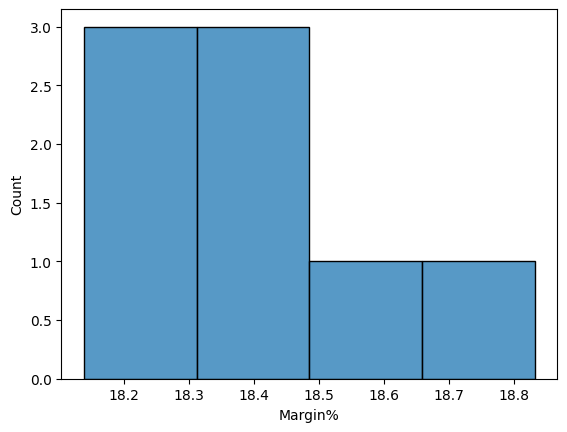

In [27]:
sns.histplot(data_destination['Margin%'])

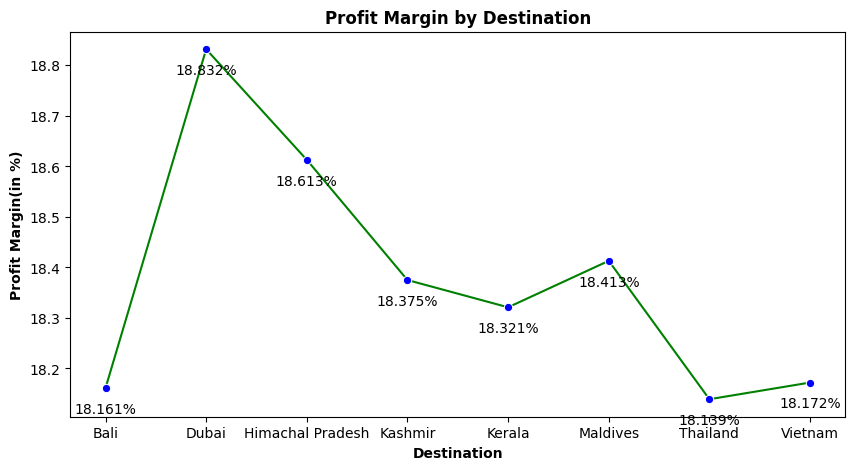

In [28]:
plt.figure(figsize=(10,5))

sns.lineplot(data_destination['Margin%'],color = 'green',marker = 'o',markerfacecolor = 'blue')
for x, y in zip(data_destination.index, data_destination['Margin%']):
    plt.text(x, y-0.05, f'{y}%', fontsize=10, ha='center')
plt.ylabel('Profit Margin(in %)',fontweight = 'bold')
plt.xlabel('Destination',fontweight = 'bold')
plt.title('Profit Margin by Destination',fontweight = 'bold')
plt.grid(False)

plt.gca().set_facecolor('none')
plt.show()

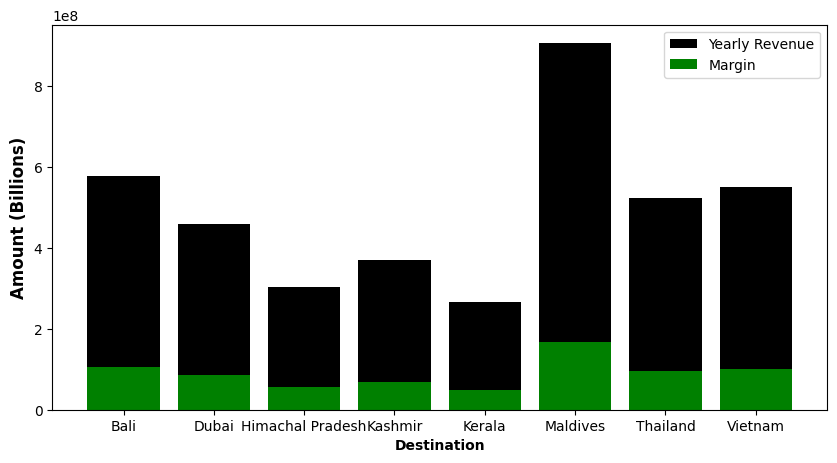

In [29]:
plt.figure(figsize=(10,5))
plt.bar(data_destination.index,data_destination['selling_price'],color = 'black',label = 'Yearly Revenue')
plt.bar(data_destination.index,data_destination['markup'],color = 'green',label = 'Margin')
plt.ylabel('Value',fontweight = 'bold')
plt.xlabel('Destination',fontweight = 'bold')

# Set y-axis title as "Profit Margin %" in bold
plt.ylabel('Amount (Billions)', fontsize=12, fontweight='bold')
plt.legend()

In [30]:
data_month = data.groupby(['month_name'])[['selling_price','markup']].sum()

In [31]:
data_month['Margin%'] = round(data_month['markup']/data_month['selling_price']*100,3)

In [32]:
data_month

,selling_price,markup,Margin%
month_name,,,
Apr,3.396850e+08,6.277896e+07,18.482
Aug,3.361333e+08,6.082672e+07,18.096
Dec,3.183167e+08,5.883522e+07,18.483
Feb,3.017333e+08,5.376667e+07,17.819
Jan,3.394121e+08,6.274358e+07,18.486
Jul,3.485208e+08,6.292433e+07,18.055
Jun,3.213837e+08,5.937577e+07,18.475
Mar,3.353863e+08,6.186262e+07,18.445
May,3.426079e+08,6.444606e+07,18.810


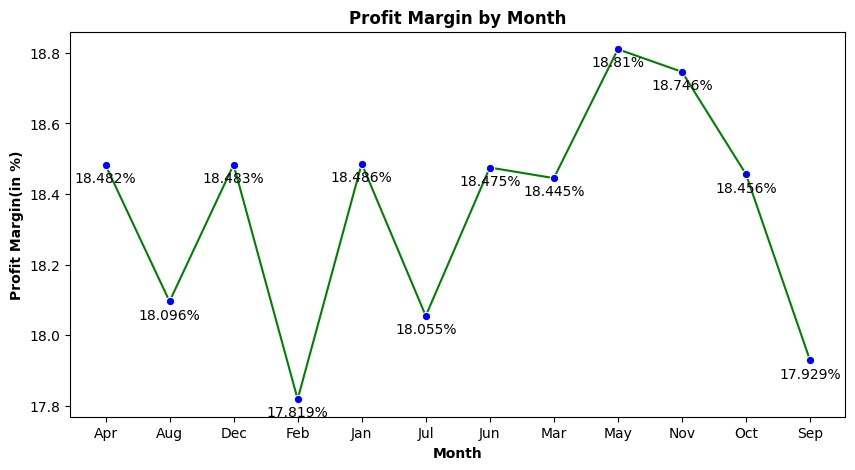

In [33]:
plt.figure(figsize=(10,5))

sns.lineplot(data_month['Margin%'],color = 'green',marker = 'o',markerfacecolor = 'blue')
for x, y in zip(data_month.index, data_month['Margin%']):
    plt.text(x, y-0.05, f'{y}%', fontsize=10, ha='center')
plt.ylabel('Profit Margin(in %)',fontweight = 'bold')
plt.xlabel('Month',fontweight = 'bold')
plt.title('Profit Margin by Month',fontweight = 'bold')
plt.grid(False)

plt.gca().set_facecolor('none')
plt.show()

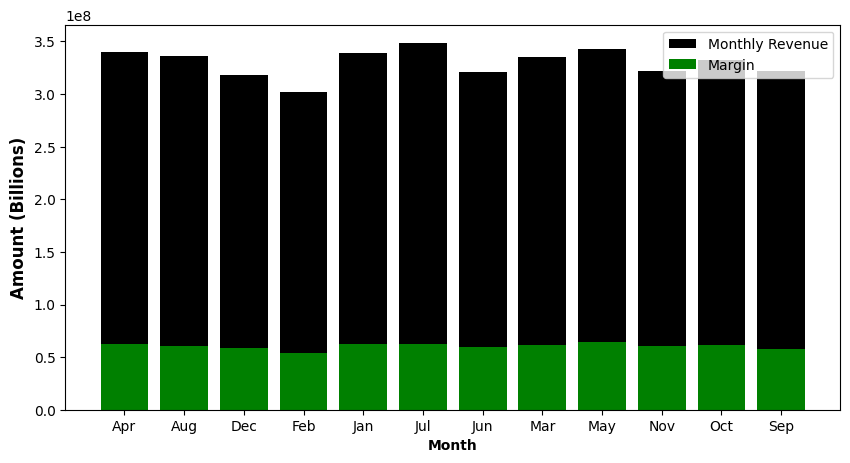

In [34]:
plt.figure(figsize=(10,5))
plt.bar(data_month.index,data_month['selling_price'],color = 'black',label = 'Monthly Revenue')
plt.bar(data_month.index,data_month['markup'],color = 'green',label = 'Margin')
plt.ylabel('Value',fontweight = 'bold')
plt.xlabel('Month',fontweight = 'bold')

# Set y-axis title as "Profit Margin %" in bold
plt.ylabel('Amount (Billions)', fontsize=12, fontweight='bold')
plt.legend()

In [35]:
df['booking_status'].value_counts()

,count
booking_status,
Confirmed,17732
Canceled,3530
Failed,2395


In [36]:
def encode(s):
  if s == 'Confirmed':
    return 1
  elif s == 'Canceled':
    return -1
  else:
    return 0

In [37]:
df['bs'] = df['booking_status'].apply(encode)

In [38]:
df.bs.value_counts()

,count
bs,
1,17732
-1,3530
0,2395


In [39]:
cancellations_per_month = df[df['bs']==-1].groupby(['month_name']).size()

In [40]:
cancellations_per_month

,0
month_name,
Apr,270
Aug,286
Dec,269
Feb,284
Jan,317
Jul,332
Jun,284
Mar,298
May,287


In [41]:
total_bookings_per_month = df.groupby('month_name').size()

In [42]:
cancellation_rate = round(cancellations_per_month / total_bookings_per_month*100,2)

In [43]:
cancellation_rate

,0
month_name,
Apr,14.01
Aug,14.21
Dec,14.00
Feb,15.33
Jan,15.62
Jul,16.06
Jun,14.56
Mar,15.01
May,13.86


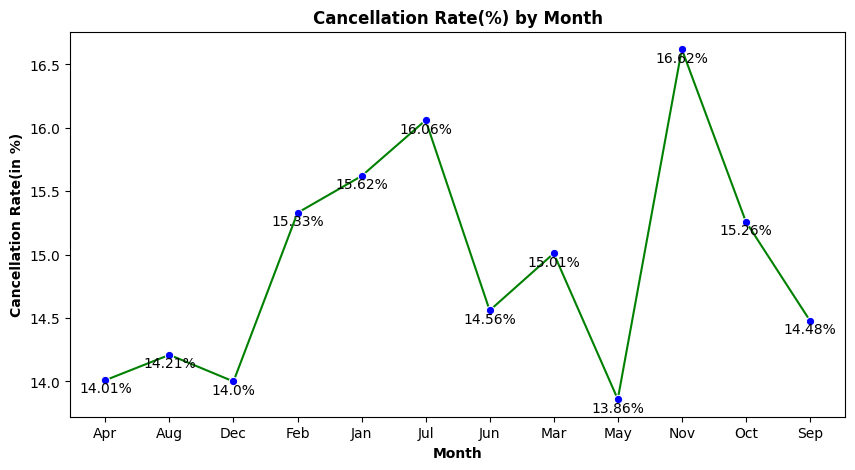

In [44]:
plt.figure(figsize=(10,5))

sns.lineplot(cancellation_rate,color = 'green',marker = 'o',markerfacecolor = 'blue')
for x, y in zip(cancellation_rate.index, cancellation_rate):
    plt.text(x, y-0.1, f'{y}%', fontsize=10, ha='center')
plt.ylabel('Cancellation Rate(in %)',fontweight = 'bold')
plt.xlabel('Month',fontweight = 'bold')
plt.title('Cancellation Rate(%) by Month',fontweight = 'bold')
plt.grid(False)

plt.gca().set_facecolor('none')
plt.show()

In [45]:
df.dtypes

,0
agent_id,int64
supplier_id,int64
Destination,object
Booking date,datetime64[ns]
pax,int64
booking_status,object
travel_date,datetime64[ns]
coupon_redeem,int64
Coupon Used?,object
costprice,float64


In [46]:
bins = pd.to_timedelta(['0 days', '7 days', '14 days', '30 days', '60 days', '365 days'])
labels = ['0-7 days', '8-14 days', '15-30 days', '31-60 days', '61+ days']
df['booking_window'] = pd.cut(df['date_diff'], bins=bins, labels=labels)

booking_window
15-30 days    36.078116
8-14 days     32.282200
31-60 days    10.872046
61+ days      10.834003
0-7 days       9.933635
Name: count, dtype: float64


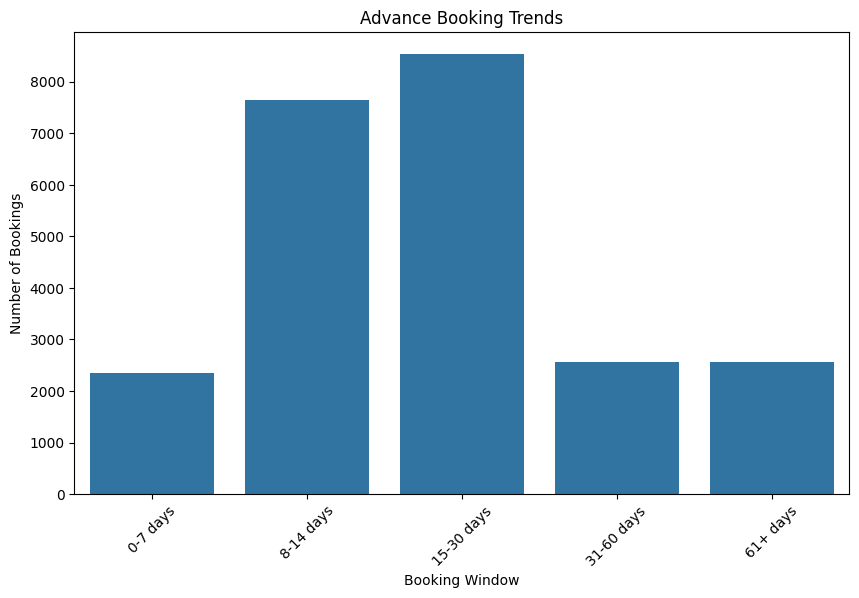

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='booking_window', data=df, order=labels)  # Order bars according to labels
plt.xlabel('Booking Window')
plt.ylabel('Number of Bookings')
plt.title('Advance Booking Trends')
plt.xticks(rotation=45)


# Calculate and print the percentage of bookings in each window
booking_window_counts = df['booking_window'].value_counts()
total_bookings = len(df)

# booking_window_counts = {'0-7 days':2350,'8-14 days':7637,'15-30 days':8535,'31-60 days':2572,'61+ days':2563}
booking_window_percentages = (booking_window_counts / total_bookings) * 100
# for i, v in enumerate(booking_window_counts):
#   print(v)
#   plt.text(i, v , f'{booking_window_percentages.iloc[i]:.1f}%', ha='center', fontsize=10)
print(booking_window_percentages)